In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
num_classes = 3
EPOCHS = 15
BS = 32

In [7]:
data = np.load('data_seperate_halfsize_alexnet_79.npy')
labels = np.load('labels_seperate_halfsize_alexnet_79.npy')

Text(0.5, 1.0, '2')

<Figure size 432x288 with 0 Axes>

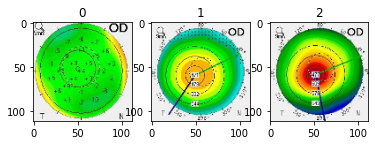

In [11]:
plt.figure()
f, axarr = plt.subplots(1,3)

axarr[0].imshow(data[(1)+0])
axarr[0].set_title(labels[(1)+0])

axarr[1].imshow(data[(200)*7+0])
axarr[1].set_title(labels[(200)*7+0])

axarr[2].imshow(data[(200+173)*7+0])
axarr[2].set_title(labels[(200+173)*7+0])

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle


data, labels = shuffle(data, labels)

train_input, valid_input, train_target, valid_target = train_test_split(data,
                                                                      labels,
                                                                      shuffle=True,
                                                                      test_size=0.25)

train_input, train_target = data[:-140], labels[:-140]
test_input, test_target = data[-140:], labels[-140:]

valid_target_org = valid_target
test_target_org = test_target
train_target_org = train_target

train_target = to_categorical(train_target)
valid_target = to_categorical(valid_target)
test_target = to_categorical(test_target)

In [9]:
print('Train set:', train_input.shape,  train_target.shape)
print('Valid set:', valid_input.shape,  valid_target.shape)
print('Test set:', test_input.shape,  test_target.shape)

Train set: (3871, 112, 112, 3) (3871, 3)
Valid set: (1003, 112, 112, 3) (1003, 3)
Test set: (140, 112, 112, 3) (140, 3)


In [ ]:
# plt.figure()
# f, axarr = plt.subplots(1,6)

# axarr[0].imshow(valid_input[0])
# axarr[0].set_title(valid_target_org[0])

# axarr[1].imshow(valid_input[1])
# axarr[1].set_title(valid_target_org[1])

# axarr[2].imshow(valid_input[2])
# axarr[2].set_title(valid_target_org[2])

# axarr[3].imshow(valid_input[3])
# axarr[3].set_title(valid_target_org[3])

# axarr[4].imshow(valid_input[4])
# axarr[4].set_title(valid_target_org[4])

# axarr[5].imshow(valid_input[5])
# axarr[5].set_title(valid_target_org[5])

Text(0.5, 1.0, '0')

<Figure size 432x288 with 0 Axes>

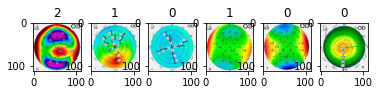

In [10]:
plt.figure()
f, axarr = plt.subplots(1,6)

axarr[0].imshow(train_input[0])
axarr[0].set_title(train_target_org[0])

axarr[1].imshow(train_input[1])
axarr[1].set_title(train_target_org[1])

axarr[2].imshow(train_input[2])
axarr[2].set_title(train_target_org[2])

axarr[3].imshow(train_input[3])
axarr[3].set_title(train_target_org[3])

axarr[4].imshow(train_input[4])
axarr[4].set_title(train_target_org[4])

axarr[5].imshow(train_input[5])
axarr[5].set_title(train_target_org[5])

In [11]:
num_classes = train_target.shape[1]
input_shape = train_input.shape[1:]

input_shape,num_classes

((112, 112, 3), 3)

In [12]:
model = models.Sequential()

# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

model.add(layers.Conv2D(96, 11, strides=4, padding='same', input_shape=input_shape))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 4, 4, 256)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [ ]:
# model = models.Sequential()

# # model.add(layers.experimental.preprocessing.Resizing(28, 28, interpolation="bilinear", input_shape=train_input.shape[1:]))


# model.add(layers.Conv2D(6, 5, padding='same',input_shape=input_shape))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(6, strides=2))

# model.add(layers.Conv2D(16, 5, padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(16, strides=2))


# model.add(layers.Flatten())
# model.add(layers.Dense(60, activation='relu'))
# model.add(layers.Dense(42, activation='relu'))
# model.add(layers.Dense(num_classes, activation='softmax'))

# model.summary()

In [ ]:
# import pydot
# import graphviz
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

metric = 'val_accuracy'
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

path_checkpoint = "Model/check/model_4.h5"
checkpoint = ModelCheckpoint(path_checkpoint,
                             monitor=metric,
                             verbose=1,
                             save_best_only=True,
                             mode = 'auto')

callbacks = [checkpoint] #,early_stopping

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_input, train_target, batch_size=BS, epochs=EPOCHS, verbose=1, shuffle=True, validation_data=(valid_input, valid_target), callbacks=callbacks)

Epoch 1/15
121/121 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.6913
Epoch 00001: val_accuracy improved from -inf to 0.71685, saving model to Model/check/model_4.h5
121/121 [==============================] - 51s 418ms/step - loss: 0.5792 - accuracy: 0.6913 - val_loss: 0.5486 - val_accuracy: 0.7168
Epoch 2/15
121/121 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7114
Epoch 00002: val_accuracy did not improve from 0.71685
121/121 [==============================] - 49s 408ms/step - loss: 0.5636 - accuracy: 0.7114 - val_loss: 0.5608 - val_accuracy: 0.6989
Epoch 3/15
121/121 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.7089
Epoch 00003: val_accuracy improved from 0.71685 to 0.73280, saving model to Model/check/model_4.h5
121/121 [==============================] - 53s 438ms/step - loss: 0.5618 - accuracy: 0.7089 - val_loss: 0.5398 - val_accuracy: 0.7328
Epoch 4/15
121/121 [==============================] - ETA: 0

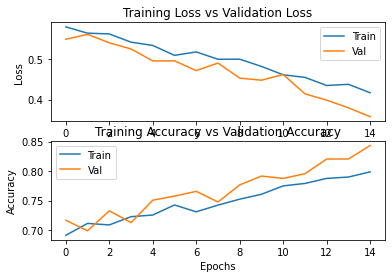

In [20]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [21]:
# evaluate the model

scores = model.evaluate(test_input, test_target, verbose=1)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

5/5 [==============================] - 0s 24ms/step - loss: 0.5192 - accuracy: 0.7929
Accuracy: 0.7928571701049805 
 Error: 20.714282989501953


Text(0.5, 1.0, '1')

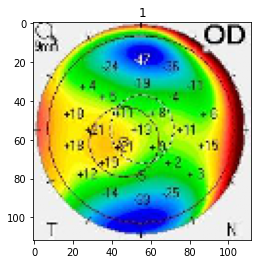

In [60]:
# path_checkpoint = "Model/check/model.h5"
# model.load_weights(path_checkpoint)
# print(test_target_org)
number_of_test = 21
predictions = model.predict(test_input)[number_of_test]
plt.imshow(test_input[number_of_test])
plt.title(test_target_org[number_of_test])

In [61]:
label_t = np.argmax(predictions)
proba = np.max(predictions)
labell = "{}: {:.2f}%".format(label_t, proba * 100)

In [62]:

print("prediction is:", label_t,"with accuracy of", proba,"True Lable:",test_target_org[number_of_test])

prediction is: 1 with accuracy of 0.8155722 True Lable: 1


In [78]:
j =0;
for i in range(139):
    predictions = model.predict(test_input)[i]
    label_t = np.argmax(predictions)
    proba = np.max(predictions)
    labell = "{}: {:.2f}%".format(label_t, proba * 100)
    if label_t != test_target_org[i]:
        j = j+1
#         plt.imshow(test_input[i])
        print("prediction is:", label_t,"with accuracy of", proba,"True Lable:",test_target_org[i])

print(j,"predictions Failed out of 140")

prediction is: 1 with accuracy of 0.63832366 True Lable: 0
prediction is: 1 with accuracy of 0.58780676 True Lable: 0
prediction is: 2 with accuracy of 0.9555772 True Lable: 1
prediction is: 1 with accuracy of 0.69390947 True Lable: 0
prediction is: 1 with accuracy of 0.5246315 True Lable: 0
prediction is: 0 with accuracy of 0.9002419 True Lable: 1
prediction is: 2 with accuracy of 0.97564334 True Lable: 1
prediction is: 0 with accuracy of 0.4987863 True Lable: 1
prediction is: 2 with accuracy of 0.8389885 True Lable: 1
prediction is: 1 with accuracy of 0.5981319 True Lable: 0
prediction is: 1 with accuracy of 0.6592437 True Lable: 0
prediction is: 0 with accuracy of 0.6934262 True Lable: 1
prediction is: 1 with accuracy of 0.6687595 True Lable: 0
prediction is: 1 with accuracy of 0.5386285 True Lable: 0
prediction is: 1 with accuracy of 0.64390856 True Lable: 0
prediction is: 1 with accuracy of 0.63925564 True Lable: 0
prediction is: 0 with accuracy of 0.53377664 True Lable: 1
predict